# Analysis of California Wildfires

This is an analysis of a data.gov California wildfire dataset that goes from ~1950-2020

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [5]:
df = pd.read_csv("~/wildifires/data.csv")

In [6]:
df.dtypes

OBJECTID          int64
YEAR_             int64
STATE            object
AGENCY           object
UNIT_ID          object
FIRE_NAME        object
INC_NUM          object
ALARM_DATE       object
CONT_DATE        object
CAUSE           float64
COMMENTS         object
REPORT_AC       float64
GIS_ACRES       float64
C_METHOD        float64
OBJECTIVE       float64
FIRE_NUM         object
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

In [7]:
df.head(5)

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPE_Length,SHAPE_Area
0,21440,2020,CA,CDF,NEU,NELSON,00013212,2020/06/18 00:00:00+00,2020/06/23 00:00:00+00,11.0,NaN,110.0,109.602280,1.0,1.0,NaN,4179.743142,7.331347e+05
1,21441,2020,CA,CDF,NEU,AMORUSO,00011799,2020/06/01 00:00:00+00,2020/06/04 00:00:00+00,2.0,NaN,670.0,685.585020,1.0,1.0,NaN,12399.375391,4.578172e+06
2,21442,2020,CA,CDF,NEU,ATHENS,00018493,2020/08/10 00:00:00+00,2020/03/01 00:00:00+00,14.0,NaN,26.0,27.300480,1.0,1.0,NaN,2119.194120,1.823876e+05
3,21443,2020,CA,CDF,NEU,FLEMING,00007619,2020/03/31 00:00:00+00,2020/04/01 00:00:00+00,9.0,NaN,13.0,12.931545,1.0,1.0,NaN,2029.524881,8.667942e+04
4,21444,2020,CA,CDF,NEU,MELANESE,00008471,2020/04/14 00:00:00+00,2020/04/19 00:00:00+00,18.0,NaN,10.3,10.315964,1.0,1.0,NaN,1342.742903,7.017912e+04


In [8]:
df = df.drop(["OBJECTID", "STATE", "AGENCY", "UNIT_ID", "INC_NUM", "CONT_DATE", "CAUSE", "COMMENTS", "REPORT_AC", "C_METHOD", "OBJECTIVE", "FIRE_NUM", "SHAPE_Length", "SHAPE_Area"], axis=1)
df = df.rename(columns={"YEAR_": "Year", "FIRE_NAME": "Fire Name", "ALARM_DATE": "Start Date", "GIS_ACRES": "Acres Burned"})

In [9]:
df.drop_duplicates()
df.dropna()
df.head(5)

,Year,Fire Name,Start Date,Acres Burned
0,2020,NELSON,2020/06/18 00:00:00+00,109.602280
1,2020,AMORUSO,2020/06/01 00:00:00+00,685.585020
2,2020,ATHENS,2020/08/10 00:00:00+00,27.300480
3,2020,FLEMING,2020/03/31 00:00:00+00,12.931545
4,2020,MELANESE,2020/04/14 00:00:00+00,10.315964


In [10]:
df.count()

Year            16444
Fire Name       16400
Start Date      14823
Acres Burned    16444
dtype: int64

<AxesSubplot:xlabel='Acres Burned'>

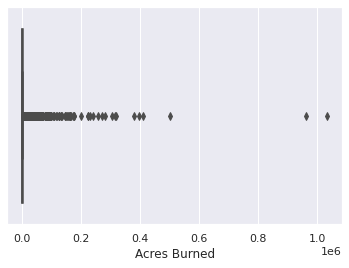

In [11]:
sns.boxplot(x=df["Acres Burned"])

As we can see, there are a few outliters around 1.0 that should be dealt with in order to determine a more accurate trend. Most fires tend to be small, but we are more interested in the behavior of the mid-sized fires, as this can help us gain some insight.

In [12]:
df["Start Date"] = df["Start Date"].str[:-12]

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             35.000000
Acres Burned    563.940798
dtype: float64


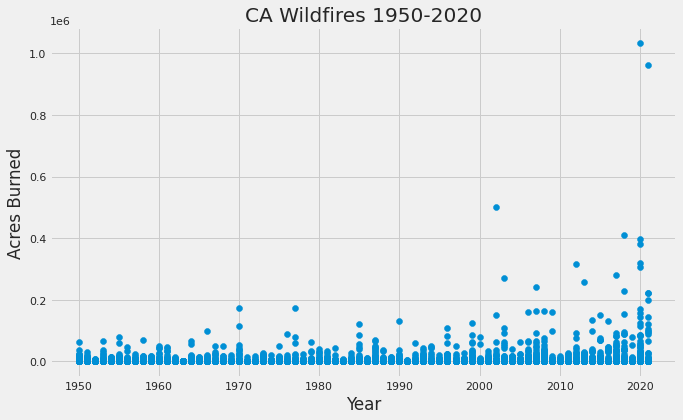

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Acres Burned'])
ax.set_xlabel('Year')
ax.set_ylabel('Acres Burned')
plt.style.use('fivethirtyeight')
plt.title("CA Wildfires 1950-2020")
plt.savefig("wildfires.png")
plt.show()